In [1]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier 
import pandas as pd


In [2]:
# Read breast cancer csv file
data = pd.read_csv('wisconsin_breast_cancer.csv')
data=data.dropna(how='any') # Dropping any rows that has missing values

In [3]:
x=data[['thickness','size','shape','adhesion','single','nuclei','chromatin','nucleoli','mitosis']] 
#creating feature data set
x.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [4]:
y=data['class']
#y.columns = range(x.shape[1])
y


0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     0
24     0
25     1
26     0
27     0
28     0
29     0
30     0
      ..
669    1
670    1
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    1
681    1
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    1
692    0
693    0
694    0
695    0
696    1
697    1
698    1
Name: class, dtype: int64

In [5]:
x.columns = range(x.shape[1])

x.head()

,0,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [6]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
params = {
    'objective' : 'binary:logistic',
    'max_depth' : 5,
    'learning_rate' : 1,
    'silent' :1,
    'n_estimators' : 100
}


In [8]:
bst = XGBClassifier(**params).fit(x_train, y_train)

In [9]:
y_pred_class = bst.predict(x_test)


In [10]:
accuracy_score(y_test, y_pred_class)

0.96491228070175439

In [11]:
%matplotlib inline

In [12]:
# Looks like size in the most important factor 

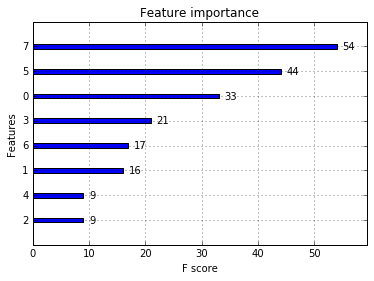

In [13]:
xgb.plot_importance(bst)

In [14]:
# Nucleoli seems to be the most important feature

In [16]:
from sklearn import metrics
print metrics.confusion_matrix(y_test, y_pred_class)

[[104   3]
 [  3  61]]


In [17]:
confusion =metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [18]:
# Let us see the sensitivity of our XGBoost model
print TP / float(TP+FN)

0.953125


In [19]:
# Let us calculate specificity
print TN / float(TN+FP)

0.971962616822


In [20]:
# precison - when it is predicting cancer how precise is it 
# positive predictive value 
print TP / float(TP+FP)

0.953125


In [21]:
# Negative predictive value
print TN / float(TN+ FN)

0.971962616822


In [22]:
from sklearn.metrics import roc_auc_score
# calculates the probability of predicting "1" (cancer) and store the out put in probab_cancer
proba_cancer=bst.predict_proba(x_test)[:,1]

In [23]:
roc_auc_score(y_test, proba_cancer)

0.99401285046728971